In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_diabetes
x,y=load_diabetes(return_X_y=True)

In [5]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [6]:
y=pd.DataFrame(y)
y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

[Text(0.592532265150076, 0.9722222222222222, 'x[2] <= 0.005\nsquared_error = 6044.625\nsamples = 331\nvalue = 154.344'),
 Text(0.3329321214855623, 0.9166666666666666, 'x[8] <= 0.006\nsquared_error = 3735.274\nsamples = 197\nvalue = 119.787'),
 Text(0.4627321933178191, 0.9444444444444444, 'True  '),
 Text(0.162349805281155, 0.8611111111111112, 'x[8] <= -0.043\nsquared_error = 2507.936\nsamples = 140\nvalue = 101.514'),
 Text(0.08035714285714286, 0.8055555555555556, 'x[4] <= -0.039\nsquared_error = 1500.028\nsamples = 45\nvalue = 80.289'),
 Text(0.05585106382978723, 0.75, 'x[4] <= -0.046\nsquared_error = 1754.13\nsamples = 26\nvalue = 93.846'),
 Text(0.04027355623100304, 0.6944444444444444, 'x[0] <= -0.0\nsquared_error = 1073.407\nsamples = 22\nvalue = 82.045'),
 Text(0.02735562310030395, 0.6388888888888888, 'x[9] <= -0.014\nsquared_error = 720.359\nsamples = 16\nvalue = 73.875'),
 Text(0.019756838905775075, 0.5833333333333334, 'x[5] <= -0.08\nsquared_error = 650.391\nsamples = 13\nvalue

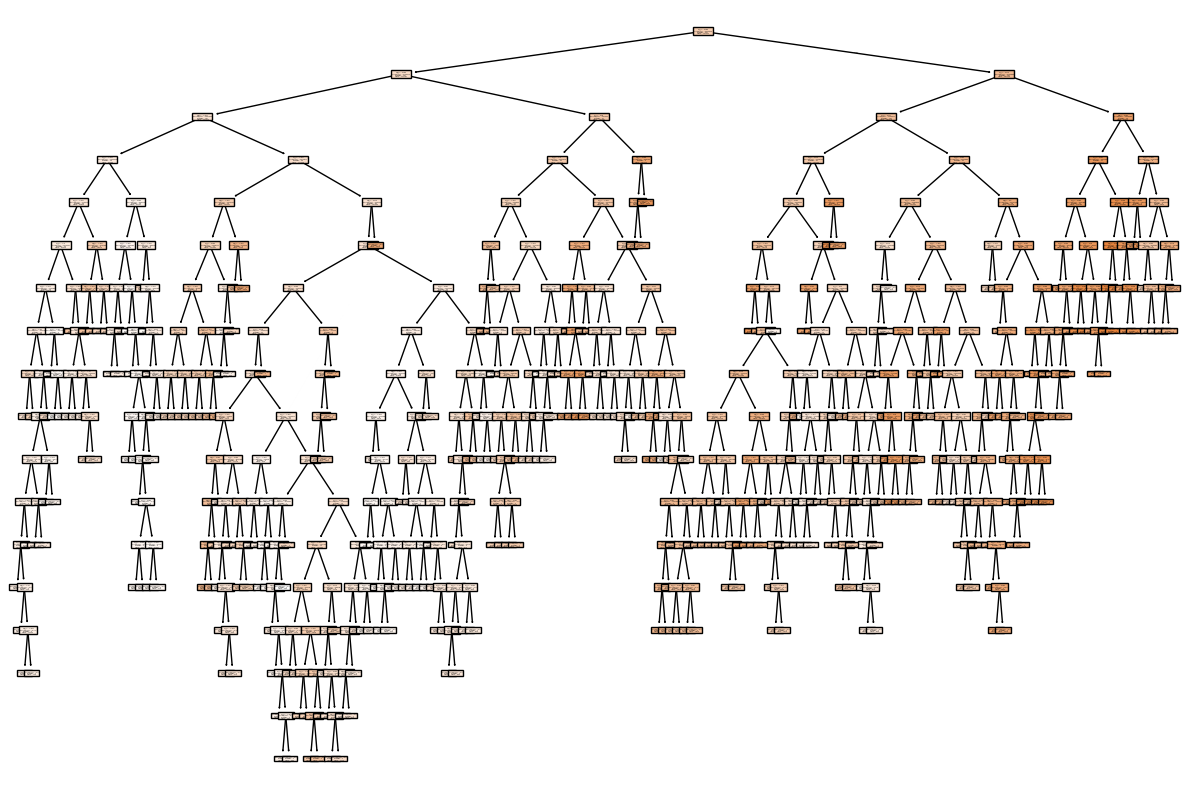

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model,filled=True)

In [14]:
from sklearn.metrics import r2_score
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))


-0.08562204618176428


Hyperparameter tuning:

In [15]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}


In [19]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,param_grid=param,cv=5,scoring='r2')
grid.fit(x_train,y_train)

c:\Users\vatsa\Downloads\KrishNaikML\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vatsa\Downloads\KrishNaikML\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vatsa\Downloads\KrishNaikML\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\vatsa\Downloads\KrishNaikML\venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_par

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [20]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [21]:
grid.best_score_

np.float64(0.30806519895652323)